[View in Colaboratory](https://colab.research.google.com/github/mukul-rathi/workshop-deep-learning/blob/master/ConvNet.ipynb)

# Convolutional Neural Net

This is the notebook accompanying the CNN workshop

First, let's import dependencies:

In [0]:

#import the keras functions
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense
from keras.optimizers import Adam
from  keras.utils import to_categorical as OneHotEncode
from keras import backend as K
#to manipulate arrays
import numpy as np
#to visualise outputs
import matplotlib.pyplot as plt
#import the MNIST dataset
from keras.datasets import mnist



Using TensorFlow backend.


Read in the data:

In [0]:
#Load in the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
num_train_examples = x_train.shape[0]
num_test_examples = x_test.shape[0]

# reshape array so dims are (num_examples, 28, 28, 1)
x_train = np.reshape(x_train, (num_train_examples, 28,28,1))
x_test = np.reshape(x_test, (num_test_examples, 28,28,1))

# divide both arrays by 255 (to normalise from [0..255] to [0..1])
x_train= x_train / 255
x_test = x_test / 255

#one hot encode
y_train = OneHotEncode(y_train, num_classes)
y_test = OneHotEncode(y_test, num_classes)

Define the model

In [0]:
def initCNN(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1),
               activation='relu',
           input_shape=(input_shape), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model



In [0]:
convNet = initCNN(x_train[0].shape, num_classes)
convNet.summary() #print the shape of the 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [0]:
convNet.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
convNet.fit(x_train, y_train, epochs=5, batch_size=256,verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 1.7627 - acc: 0.5389 - val_loss: 0.7131 - val_acc: 0.8187
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.4905 - acc: 0.8608 - val_loss: 0.3587 - val_acc: 0.8985
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3315 - acc: 0.9031 - val_loss: 0.2986 - val_acc: 0.9107
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2721 - acc: 0.9202 - val_loss: 0.2502 - val_acc: 0.9280
Epoch 5/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2344 - acc: 0.9305 - val_loss: 0.2230 - val_acc: 0.9350


In [0]:
loss, accuracy = convNet.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: " + str(accuracy))

Test Accuracy: 0.935


## Visualise the activations:


The predicted output is: 3


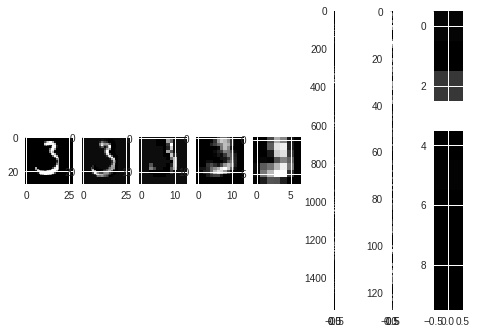

In [0]:
#choose a random integer
image = x_test[np.random.randint(0,x_test.shape[0])]
image = np.reshape(image, (1,28,28,1))

# with a Sequential model
get_layers_outputs = K.function([convNet.layers[0].input],
                                  [convNet.layers[i].output for i in range(len(convNet.layers))])


layers_outputs = get_layers_outputs([image])


#plot the outputs
fig, ax = plt.subplots(1,1+len(layers_outputs))
ax[0].imshow(image[0,:,:,0], cmap='gray')

for i, output in enumerate(layers_outputs):
  if len(output.shape)==4:
    #pick random activation map
    ax[i+1].imshow(output[0,:,:,np.random.randint(0,output.shape[-1])], cmap='gray')
  else: #dense layer
    ax[i+1].imshow(output.T,cmap='gray')

print("The predicted output is: " + str(np.argmax(convNet.predict(image))))